In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv("drive/MyDrive/Updated_Student_Performance.csv")
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({
    'No':0,
    'Yes':1,
})
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,target
0,7,99,1,9,1,91,1
1,4,82,0,4,2,65,0
2,8,51,1,7,2,45,0
3,5,52,1,5,2,36,0
4,7,75,0,8,5,66,0


**Pada dataset, ditambahkan kolom target yang menunjukkan apakah performance indexnya better atau tidak. Jika performance index >= 70, maka target menjadi 1**

In [ ]:
X = data.drop(columns=['Performance Index', 'target'], axis=1)
y = data['target']

In [ ]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [ ]:
y

0       1
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: target, Length: 10000, dtype: int64

Training & Prediction

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()

# Melatih model dengan data latih X_train dan label latih y_train.
clf.fit(X_train, y_train)

# Membuat prediksi pada data uji X_test menggunakan model yang telah dilatih.
y_pred = clf.predict(X_test)

In [437]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1429,   41],
       [  39,  491]])

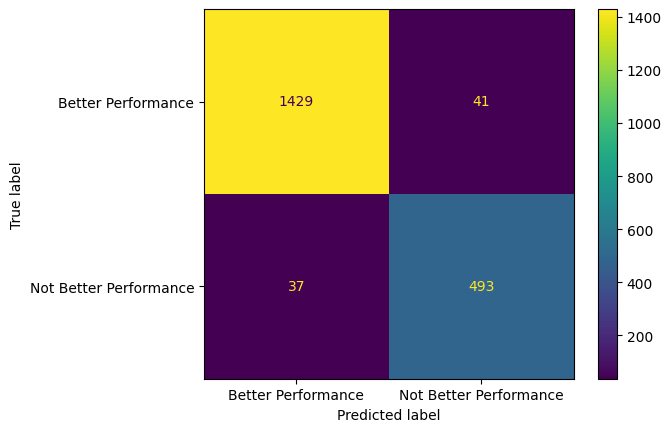

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Better Performance", "Not Better Performance"]).plot()

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall:    ", recall_score(y_test, y_pred))
print("F1 Score:  ", f1_score(y_test, y_pred))

Accuracy:  0.961
Precision:  0.9232209737827716
Recall:     0.930188679245283
F1 Score:   0.9266917293233083


Maka:
* Accuracy: 96%
* Precision: 92%
* Recall: 93%
* F1 Score: 92%



# KESIMPULAN:

---

* Model klasifikasi memiliki kinerja yang sangat baik dalam memprediksi data. Hal ini ditunjukkan oleh nilai akurasi, presisi, recall, dan f1 score yang mendekati 100%.

* Model klasifikasi lebih akurat dalam memprediksi data dengan **"Better Performance"** daripada data dengan **"Not Better Performance"**. Hal ini ditunjukkan oleh nilai recall yang lebih tinggi untuk **"Better Performance"**.
> Nilai ***recall*** yang lebih tinggi menunjukkan bahwa model klasifikasi lebih akurat dalam memprediksi data dengan **"Better Performance"** daripada data dengan label **"Not Better Performance"**.

* Model klasifikasi masih memiliki potensi untuk meningkatkan kinerjanya dalam memprediksi data dengan label not better performance. Hal ini ditunjukkan oleh nilai FN yang lebih tinggi untuk label not better performance.
> Nilai FN sebesar 37 untuk **"Not Better Performance"** menunjukkan bahwa model memprediksi 37 data **"Not Better Performance"** sebagai data dengan **"Better Performance"**. Nilai FN yang lebih tinggi untuk **"Not Better Performance"** menunjukkan bahwa model masih memiliki potensi untuk meningkatkan kinerjanya dalam memprediksi data dengan **"Not Better Performance"**.











